In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [26]:
%matplotlib inline

In [27]:
# Set default Seaborn style
sns.set()

In [7]:
file_path = '../datasets/dynamodb_20180823.json'

In [8]:
df = pd.read_json(file_path)

In [9]:
df.head()

,data,inquired,log,number,status
0,{'summary': {'date_balance': '17-07-2018 09:14...,1533957279,"{'active_contract': True, 'rut_required': False}",23569556,OK
1,{'summary': {'date_balance': '30-07-2018 09:10...,1533266814,"{'active_contract': True, 'rut_required': False}",22024384,OK
2,{'summary': {'date_balance': '01-08-2018 18:10...,1534199113,"{'active_contract': True, 'rut_required': False}",22559391,OK
3,{'summary': {'date_balance': '08-11-2016 14:49...,1533932867,"{'active_contract': True, 'rut_required': False}",20271880,without_trips
4,{'summary': {'date_balance': '26-07-2018 17:47...,1532783871,"{'active_contract': True, 'rut_required': False}",23899110,OK


### ¿Cómo se distribuyen los números de tarjetas respecto a las que tienen información?

In [167]:
chart_data = df['status'].value_counts().sample(frac=1)
sizes = chart_data.values
labels = chart_data.index
[0.1 if _ == 'OK' else 0 for _ in labels], labels

([0.1, 0, 0, 0],
 Index(['OK', 'TypeError', 'KeyError', 'without_trips'], dtype='object'))

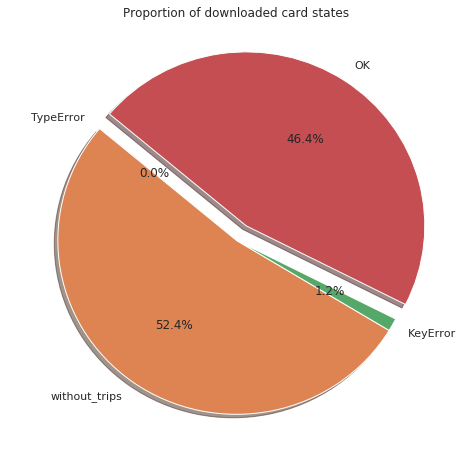

In [202]:
# Reorder randomly so that KeyError and TypeError are not together
chart_data = df['status'].value_counts().sample(frac=1)
sizes = chart_data.values
labels = chart_data.index
explode = [0.1 if _ == 'OK' else 0 for _ in labels]
_ = plt.figure(figsize=(8, 8))
_ = plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
_ = plt.title('Proportion of downloaded card states')

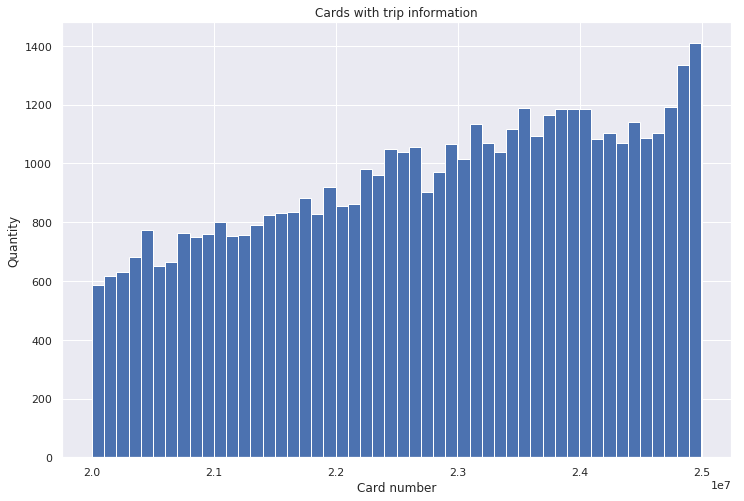

In [179]:
_ = plt.figure(figsize=(12, 8))
_ = plt.hist(df[df['status'] == 'OK']['number'], bins=50)
_ = plt.xlabel('Card number')
_ = plt.ylabel('Quantity')
_ = plt.title('Cards with trip information')

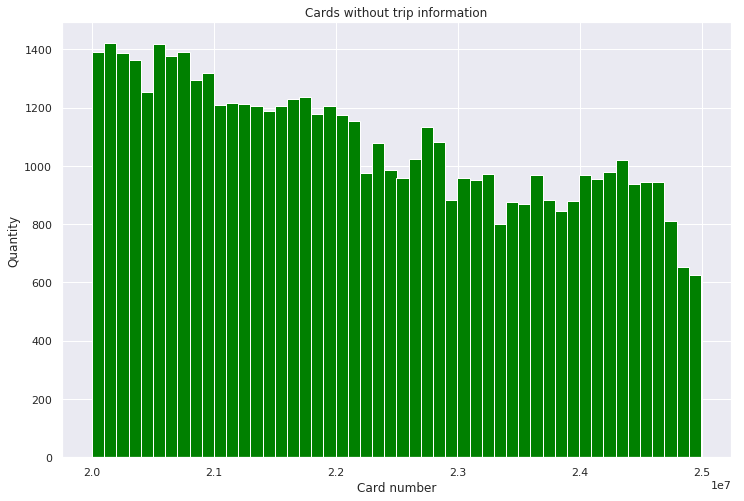

In [20]:
_ = plt.figure(figsize=(12, 8))
_ = plt.hist(df[df['status'] == 'without_trips']['number'], bins=50, color='green')
_ = plt.xlabel('Card number')
_ = plt.ylabel('Quantity')
_ = plt.title('Cards without trip information')

In [203]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x) + 1) / n

    return x, y

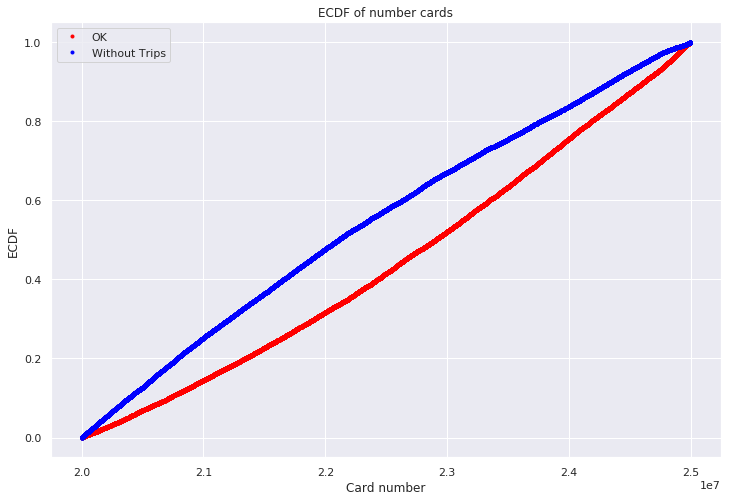

In [36]:
x_ok, y_ok = ecdf(df[df['status'] == 'OK']['number'])
x_wt, y_wt = ecdf((df[df['status'] == 'without_trips']['number']))

# Generate plot
_ = plt.figure(figsize=(12, 8))
_ = plt.plot(x_ok, y_ok, marker='.', linestyle='none', color='red')
_ = plt.plot(x_wt, y_wt, marker='.', linestyle='none', color='blue')

# Label the axes
_ = plt.xlabel('Card number')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of number cards')
_ = plt.legend(['OK', 'Without Trips'], loc='upper left')


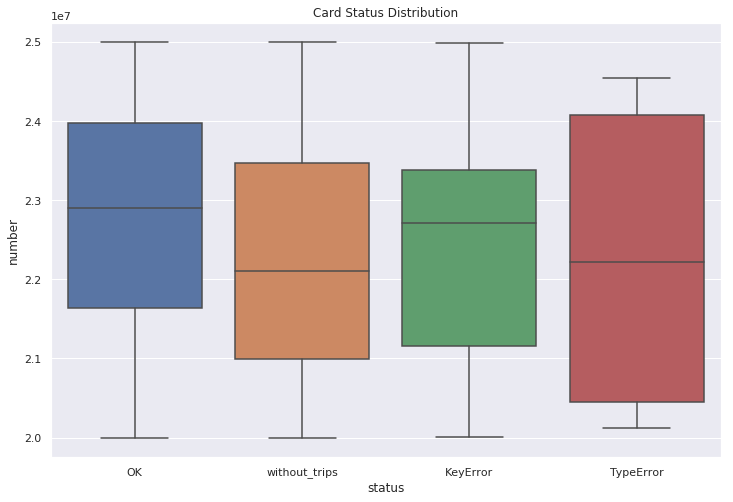

In [38]:
_ = plt.figure(figsize=(12, 8))
_ = sns.boxplot(x='status', y='number', data=df)
_ = plt.title('Card Status Distribution')